Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                              

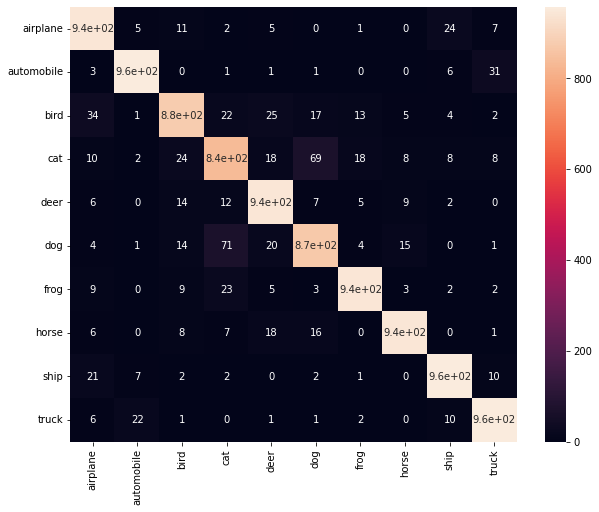

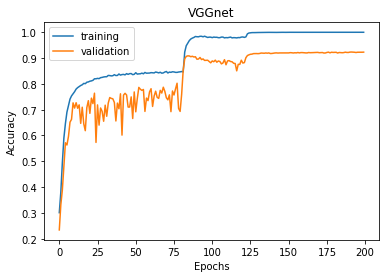

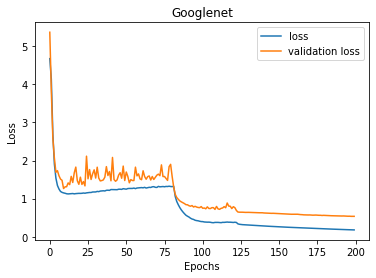

In [ ]:
import tensorflow as tf
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from google.colab import drive
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, BatchNormalization, merge
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers import Input
import pickle
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sb
drive.mount('/content/drive')
#卷积层都不dropout，最后的结果是80左右：oss: 0.4741 - accuracy: 0.9586 - val_loss: 1.2526 - val_accuracy: 0.7870
#有了dropout loss: 1.0480 - accuracy: 0.8403 - val_loss: 1.1913 - val_accuracy: 0.8123
#      flat = Flatten()(maxPooling5)

      # dense1 = Dense(units=512,kernel_regularizer=tf.keras.regularizers.l2(0.0005))(flat)
      # batch1 = BatchNormalization()(dense1)
      # acti = Activation('relu')(batch1)
      # drop = Dropout(rate=0.5)(acti)
      # dense2 = Dense(units=512,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005))(drop)
      # batch2 = BatchNormalization()(dense2)
      # acti2 = Activation('relu')(batch2)
      # drop2 = Dropout(rate=0.5)(acti2)
      # dense3 = Dense(units=10,
      #   activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0005))(drop2)
def normalization(train_images, test_images):
    mean = np.mean(train_images, axis=(0, 1, 2, 3))
    std = np.std(train_images, axis=(0, 1, 2, 3))
    train_images = (train_images - mean) / (std + 1e-7)
    test_images = (test_images - mean) / (std + 1e-7)
    return train_images, test_images

def load_images():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

    train_images = train_images.astype(np.float32)
    test_images = test_images.astype(np.float32)

    (train_images, test_images) = normalization(train_images, test_images)

    train_labels = to_categorical(train_labels, 10)
    test_labels = to_categorical(test_labels, 10)

    # train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
    #     buffer_size=10000).batch(batch_size)
    # test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

    return train_images, train_labels, test_images, test_labels




def Conv_layer(x, filters, kernel_size, strides=(1, 1), padding='SAME', weight_decay=0.0005, rate=0.5, drop=True):
	x = Conv2D(filters, kernel_size, strides=strides, padding=padding,
		           kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(x)

	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	if drop:
			x = Dropout(rate=rate)(x)
	return x




def VGG19Model(x):
      conv1_1 = Conv_layer(x,filters=64, kernel_size=(3, 3), rate=0.3)
      conv1_2 = Conv_layer(conv1_1,filters=64, kernel_size=(3, 3), drop=False)
      maxPooling1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
      conv2_1 = Conv_layer(maxPooling1,filters=128, kernel_size=(3, 3))
      conv2_2 = Conv_layer(conv2_1, filters=128, kernel_size=(3, 3), drop=False)
      maxPooling2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
      conv3_1 = Conv_layer(maxPooling1,filters=256, kernel_size=(3, 3))
      conv3_2 = Conv_layer(conv3_1, filters=256, kernel_size=(3, 3), drop=False)
      conv3_3 = Conv_layer(conv3_2, filters=256, kernel_size=(3, 3), drop=False)
      conv3_4 = Conv_layer(conv3_3, filters=256, kernel_size=(3, 3), drop=False)
      maxPooling3 = MaxPooling2D(pool_size=(2, 2))(conv3_4)
      conv4_1 = Conv_layer(maxPooling3, filters=512, kernel_size=(3, 3))
      conv4_2 = Conv_layer(conv4_1, filters=512, kernel_size=(3, 3), drop=False)
      conv4_3 = Conv_layer(conv4_2,filters=512, kernel_size=(3, 3), drop=False)
      conv4_4 = Conv_layer(conv4_3,filters=512, kernel_size=(3, 3), drop=False)
      maxPooling4 = MaxPooling2D(pool_size=(2, 2))(conv4_4)
      conv5_1 = Conv_layer(maxPooling4, filters=512, kernel_size=(3, 3))
      conv5_2 = Conv_layer(conv5_1, filters=512, kernel_size=(3, 3), drop=False)
      conv5_3 = Conv_layer(conv5_2, filters=512, kernel_size=(3, 3), drop=False)
      conv5_4 = Conv_layer(conv5_3, filters=512, kernel_size=(3, 3), drop=False)
      maxPooling5 = MaxPooling2D(pool_size=(2, 2))(conv5_4)
      drop1 = Dropout(rate=0.5)(maxPooling5)
      flat = Flatten()(drop1)
      dense1 = Dense(units=512,kernel_regularizer=tf.keras.regularizers.l2(0.0005))(flat)
      batch1 = BatchNormalization()(dense1)
      acti = Activation('relu')(batch1)
      dense2 = Dense(units=10,
        activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0005))(acti)
      return dense2

def build_optimizer(learning_rate=0.1, momentum=0.9):
    learning_rate = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        	[500, 32000, 48000],
        	[learning_rate / 10., learning_rate, learning_rate / 10., learning_rate / 100.])

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

    return optimizer



if __name__ == '__main__':

	training_epochs =5
	batch_size = 128
	learning_rate = 0.1
	momentum = 0.9
	lr_decay = 1e-6
	lr_drop = 20

	tf.random.set_seed(777)
	x_train, y_train, x_test, y_test = load_images()


	# print(np.array(train_data).shape)
	# print(np.array(train_labels).shape)
	# print(train_data)
	# print(train_labels)
	# print(np.array(test_data).shape)
	# print(np.array(test_labels).shape)

	# data augmentation
	datagen = ImageDataGenerator(
		featurewise_center=False,  # set input mean to 0 over the dataset
		samplewise_center=False,  # set each sample mean to 0
		featurewise_std_normalization=False,  # divide inputs by std of the dataset
		samplewise_std_normalization=False,  # divide each input by its std
		zca_whitening=False,  # apply ZCA whitening
		rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
		width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
		height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
		horizontal_flip=True,  # randomly flip images
		vertical_flip=False)  # randomly flip images
	# (std, mean, and principal components if ZCA whitening is applied).
	datagen.fit(x_train)
	inputs = Input(shape=(32, 32, 3))
	predictions = VGG19Model(inputs)
	model = Model(inputs=inputs, outputs=predictions)



	model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        	[500, 32000, 48000],
        	[learning_rate / 10., learning_rate, learning_rate / 10., learning_rate / 100.])
, momentum=momentum)
, metrics=['accuracy'])
	model.summary()
	history = model.fit(x_train, y_train,
                        batch_size=batch_size, epochs=200, verbose=1,
                        validation_data=(x_test, y_test), shuffle=True,
                        callbacks=[])
	test_predict = model.predict(x_test)
	y_test_labels = np.argmax(test_predict, axis=1)
	y_test = np.argmax(y_test, axis=1)
	cm = confusion_matrix(y_test, y_test_labels)
	class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
	print("Confusion Matrix\n", cm)
	df_c_matrix = pd.DataFrame(cm, index=[clss for clss in class_labels], columns=[clss for clss in class_labels])
	plt.figure(figsize=(10, 8))
	sb.heatmap(df_c_matrix, annot=True)
	plt.show()
	plt.plot(history.history["accuracy"], label="training")
	plt.plot(history.history["val_accuracy"], label="validation")
	plt.title("VGGnet")
	plt.xlabel("Epochs")
	plt.ylabel("Accuracy")
	plt.legend()
	plt.show()
	plt.plot(history.history["loss"], label="loss")
	plt.plot(history.history["val_loss"], label="validation loss")
	plt.title("Googlenet")
	plt.xlabel("Epochs")
	plt.ylabel("Loss")
	plt.legend()
	plt.show()
	model.save_weights('cifar10RES19_custom.h5')